## Búsqueda de correlación entre variables

In [17]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carga de data frames

In [18]:
df_defunciones_anio = pd.read_csv('../Datos/datos_defunciones/datos_defunciones_seriet.csv', parse_dates=['FECHA'])
df_parque_anio = pd.read_csv('../Datos/datos_parquev/df_historico_transpose.csv')
df_poblacion_anio = pd.read_csv('../Datos/datos_poblacion/datos_poblacion.csv', index_col=0)

### Defunciones por años

In [19]:
df_defunciones_anio['anio'] = df_defunciones_anio['FECHA'].dt.year

In [20]:
df_defunciones_anio = df_defunciones_anio.groupby('anio')[['Defunciones']].sum().reset_index()

### Parque Vehicular por años

In [21]:
df_parque_anio = df_parque_anio[['anio', 'total']]
df_parque_anio.columns = ['anio', 'parque_vehicular']

## Población por años

### Correlación

In [22]:
# filtrar los años en común
df_defunciones = df_defunciones_anio[df_defunciones_anio['anio'].between(2007, 2023)]
df_parque_vehicular = df_parque_anio[df_parque_anio['anio'].between(2007, 2023)]
df_poblacion = df_poblacion_anio[df_poblacion_anio['anio'].between(2007, 2023)]

In [23]:
df_correlacion = df_defunciones[['anio', 'Defunciones']].merge(
    df_parque_vehicular[['anio', 'parque_vehicular']],
    on='anio'
).merge(
    df_poblacion[['anio', 'poblacion']],
    on='anio'
)

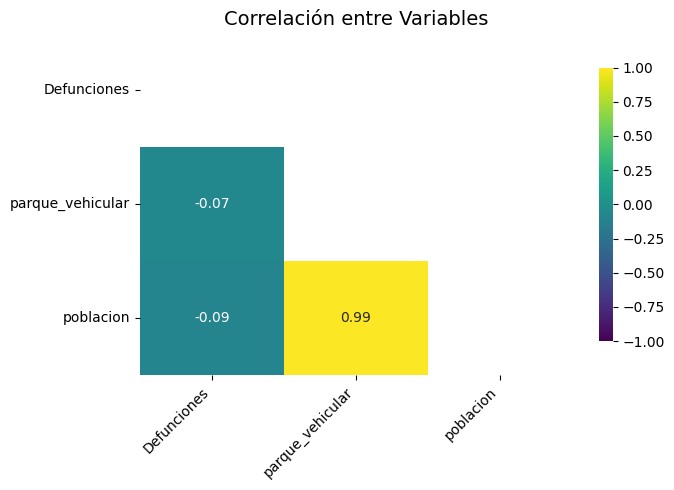

In [24]:
f.matriz_correlacion(
    dataframe=df_correlacion,
    columnas=['Defunciones', 'parque_vehicular', 'poblacion'],
    figsize=(7, 5),
    cmap='viridis',
    title='Correlación entre Variables'
)


Conclusiones

1. Correlación entre "Defunciones" y las otras variables
    - Defunciones vs parque_vehicular: Correlación de -0.07. Una correlación muy cercana a 0 y negativa, no existe relación lineal significativa entre el parque vehicular y el número de defunciones.
    - Defunciones vs población: Correlación de -0.09. Semejante al caso anterior, no representa una relación lineal significativa.
Conclusión parcial: El número de muertos producto de accidentes de tránsito, parece ser independiente del tamaño del parque vehicular y de la población en términos de correlación lineal.

2. Correlación entre "parque_vehicular" y "poblacion"
    - parque_vehicular vs población: Correlación de 0.99. Indica una correlación positiva casi perfecta, sugiere que ambas variables crecen juntas con una relación lineal muy fuerte.
Conclusión parcial: A medida que la población crece, el parque vehicular también aumenta de manera directamente proporcional.

Análisis:

    - Las defunciones no tienen una relación lineal notable con las otras dos variables, lo que puede significar que son otros factores los que influyen más en el número de defunciones. Dentro de los cuáles se pueden mencionar: calidad de las calles y carreteras, incumplimiento de las normas de tránsito, falta de medidas de protección (como uso del cinturón o cascos para los motociclistas), distracciones de los conductores, entre otras.

    - La 'poblacion' y el 'parque vehicular' están altamente correlacionados, lo que refleja una tendencia lógica: a medida que aumenta la población, también aumenta la cantidad de vehículos. Además, al pasar el tiempo pues las personas que van creciendo se pueden convertir en usuarios de vehículos propios debido a la falta de un tansporte público de calidad.

## Otras observaciones

In [25]:
df_alineado = pd.merge(df_parque_vehicular, df_poblacion, on='anio', how='inner')

In [27]:
df_alineado['vehiculos_per_capita'] = (df_alineado['parque_vehicular'] / df_alineado['poblacion']) * 1000 # numero de vehículos por cada 1000 habitantes


,anio,parque_vehicular,poblacion,vehiculos_per_capita
0,2007,2234307,9455658,236.29
1,2008,2429562,9573130,253.79
2,2009,2570220,9695265,265.10
3,2010,2734740,9820175,278.48
4,2011,2917573,9945621,293.35
5,2012,3052686,10070411,303.13
6,2013,3215773,10193833,315.46
7,2014,3398662,10315528,329.47
8,2015,3612964,10434829,346.24
9,2016,3854038,10551430,365.26


In [30]:
df_alineado['habitantes_por_vehiculo'] = df_alineado['poblacion'] / df_alineado['parque_vehicular'] # cuantas personas dependen de un vehículo
df_alineado['tasa_crecimiento_vehiculos'] = df_alineado['parque_vehicular'].pct_change() * 100
df_alineado['tasa_crecimiento_poblacion'] = df_alineado['poblacion'].pct_change() * 100
df_alineado

,anio,parque_vehicular,poblacion,vehiculos_per_capita,habitantes_por_vehiculo,tasa_crecimiento_vehiculos,tasa_crecimiento_poblacion
0,2007,2234307,9455658,236.29,4.23,NaN,NaN
1,2008,2429562,9573130,253.79,3.94,8.74,1.24
2,2009,2570220,9695265,265.10,3.77,5.79,1.28
3,2010,2734740,9820175,278.48,3.59,6.40,1.29
4,2011,2917573,9945621,293.35,3.41,6.69,1.28
5,2012,3052686,10070411,303.13,3.30,4.63,1.25
6,2013,3215773,10193833,315.46,3.17,5.34,1.23
7,2014,3398662,10315528,329.47,3.04,5.69,1.19
8,2015,3612964,10434829,346.24,2.89,6.31,1.16
9,2016,3854038,10551430,365.26,2.74,6.67,1.12


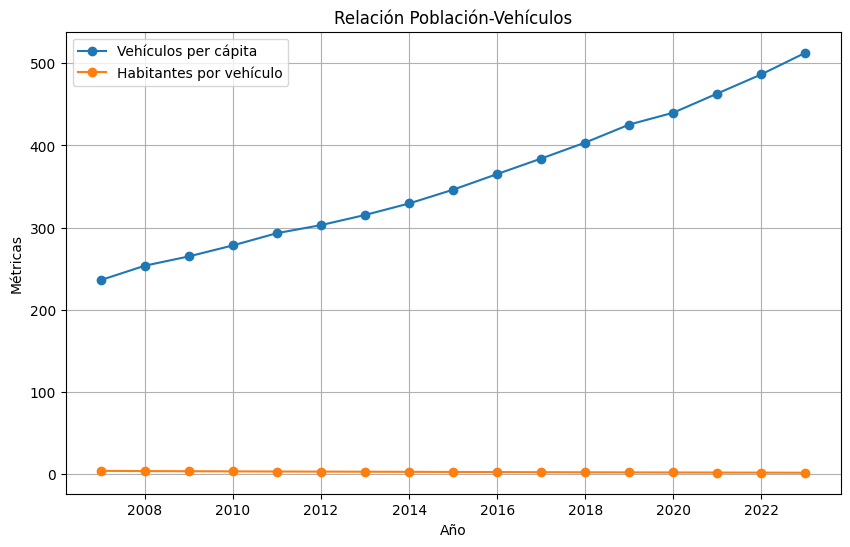

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_alineado['anio'], df_alineado['vehiculos_per_capita'], label='Vehículos per cápita', marker='o')
plt.plot(df_alineado['anio'], df_alineado['habitantes_por_vehiculo'], label='Habitantes por vehículo', marker='o')
plt.xlabel('Año')
plt.ylabel('Métricas')
plt.title('Relación Población-Vehículos')
plt.legend()
plt.grid()
plt.show()


In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Variables de entrada y salida
X = df_alineado['anio'].values.reshape(-1, 1)
y = df_alineado['vehiculos_per_capita']

# Modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Predicción
anios_futuros = np.array([2025, 2030, 2035]).reshape(-1, 1)
predicciones = model.predict(anios_futuros)
print(predicciones)


[526.58648398 610.40570822 694.22493246]
